In [36]:
from bs4 import BeautifulSoup
import requests
import nltk
import spacy

In [37]:
pln = spacy.load('pt_core_news_sm')

In [38]:
pln

<h1>Marcação POS</h1>

In [39]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [40]:
# Mostrando cada palavra e se é auxiliar, verbo, adjetivo e etc.

for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


In [41]:
"""
ADJ == Adjective
ADP == Adposition
ADV == Adverb
AUX == Auxiliary
CONJ == Conjunction
DET == Determiner
INTJ == Interjection
NOUN == Noun
NUM == Numeral
PART == Particle
PRON == Pronoun
PROPN == Proper Nown
Funct == Punctuation
SCONJ == Subordinating Conjuction
SYM == Symbol
Verb == Verb
X == Other
SPACE == Space
"""

'\nADJ == Adjective\nADP == Adposition\nADV == Adverb\nAUX == Auxiliary\nCONJ == Conjunction\nDET == Determiner\nINTJ == Interjection\nNOUN == Noun\nNUM == Numeral\nPART == Particle\nPRON == Pronoun\nPROPN == Proper Nown\nFunct == Punctuation\nSCONJ == Subordinating Conjuction\nSYM == Symbol\nVerb == Verb\nX == Other\nSPACE == Space\n'

<h1>Lematização</h1>

In [42]:
# Mostrando cada palavra e seu lema, Ex: Aprendendo -> Aprender
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [43]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')

In [44]:
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

<h1>Stemização</h1>

In [45]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jaosd\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [46]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [47]:
for token in documento:
    print(token.text, '-', token.lemma_, '-', stemmer.stem(token.text))

Estou - estar - est
aprendendo - aprender - aprend
processamento - processamento - process
de - de - de
linguagem - linguagem - lingu
natural - natural - natur
, - , - ,
curso - curso - curs
em - em - em
Curitiba - Curitiba - curitib


<h1>Webscrapping</h1>

In [48]:
dados = requests.get('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [49]:
dados = dados.text

In [54]:
dados_html = BeautifulSoup(dados, 'lxml')

In [55]:
paragrafos = dados_html.find_all('p')
len(paragrafos)

109

In [60]:
paragrafos[1].text

'É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\n'

In [61]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [62]:
conteudo

'Inteligência artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\nO desenvolvimento da área

In [64]:
# Sempre é bom converter as palavras para minusculas
# O algoritmo pode achar que 'Ele' pode ser um nome ou algo assim
conteudo = conteudo.lower()
conteudo

'inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. algumas das principais áreas relacionadas à ia incluem:\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\no desenvolvimento da área

<h1>Buscas em texto</h1>

In [65]:
string = 'turing'
token_pesquisa = pln(string)

In [67]:
from spacy.matcher import PhraseMatcher

In [69]:
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [70]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3343, 3344),
 (8661325627334373315, 3353, 3354),
 (8661325627334373315, 3509, 3510),
 (8661325627334373315, 3514, 3515),
 (8661325627334373315, 3520, 3521),
 (8661325627334373315, 3583, 3584),
 (8661325627334373315, 4236, 4237),
 (8661325627334373315, 5501, 5502),
 (8661325627334373315, 8952, 8953),
 (8661325627334373315, 9087, 9088),
 (8661325627334373315, 9182, 9183),
 (8661325627334373315, 9299, 9300)]

In [ ]:
# ↑
# ID da busca, Indice de inicio da palavra, indice onde termina

In [71]:
doc[3343:3344]

turing

In [73]:
doc[3353-5:3354+5]

chamou depois de teste de turing (tt),[31] de 1950

In [75]:
matches[0]

(8661325627334373315, 3343, 3344)

In [86]:
from IPython.core.display import HTML

texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'<p><strong>Resultado encontrados:</strong> {len(matches)}</p>'))

for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f'<mark>{string}</mark>')
    texto += "<br/><br/>"
display(HTML(f'... {texto} ...'))

<h1>Extração de entidades nomeadas</h1>

In [87]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

cotidiano).[2 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[3 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[8 PER
prolog MISC
gpt-3[14 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[11][18 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
sub-simbólico"?[25 MISC
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing.[31 LOC
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
int

In [88]:
from spacy import displacy

In [89]:
displacy.render(doc, style='ent', jupyter=True)

<h1>Nuvens de palavras</h1>

In [103]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'assim', 'cujo', 'bem', 'contra', 'ela', 'dizer', 'iniciar', 'tudo', 'vinte', 'vens', 'pois', 'pôde', 'querem', 'estou', 'fazia', 'geral', 'novas', 'um', 'ontem', 'põem', 'daquela', 'aquelas', 'boa', 'cada', 'dez', 'nessa', 'todo', 'aí', 'não', 'atrás', 'vai', 'quinto', 'disso', 'esse', 'máximo', 'menos', 'às', 'onde', 'desse', 'vossos', 'essa', 'fez', 'quinze', 'nossos', 'têm', 'povo', 'portanto', 'poderá', 'algo', 'fostes', 'tuas', 'quê', 'estiveste', 'foste', 'nas', 'neste', 'adeus', 'as', 'fazer', 'ter', 'nuns', 'és', 'tiveste', 'das', 'fará', 'pelos', 'estiveram', 'o', 'vários', 'vêm', 'apoia', 'mas', 'deverá', 'mil', 'ambas', 'tens', 'num', 'porquanto', 'falta', 'sétimo', 'debaixo', 'eles', 'teus', 'eventual', 'momento', 'temos', 'quem', 'oitavo', 'depois', 'deve', 'possível', 'meses', 'corrente', 'coisa', 'seis', 'final', 'des', 'saber', 'sem', 'esta', 'somos', 'número', 'estar', 'minha', 'cima', 'conselho', 'dezassete', 'nível', 'breve', 'de', 'pouco', 'ligado', 'até', 'vosso'

In [111]:
pln.vocab['usa'].is_stop

True

In [112]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

In [113]:
print(lista_token)

['inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplinas', '.', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[2', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de', 'dados', 'disponíveis', 'para', 'chegar', 'a', 'um

In [124]:
sem_stop = []
for palavra in lista_token:
    if not pln.vocab[palavra].is_stop:
        sem_stop.append(palavra)

In [125]:
print(sem_stop)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplinas', '.', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[2', ']', 'considerar', 'características', 'básicas', 'desses', 'sistemas', ',', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'conjunto', 'dados', 'disponíveis', 'chegar', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'acertos', 'futuro', 'possa', 'agir', 'maneira', 'eficaz', ')', ',', 'reconhecer', 'padrões', '(', 'padrões', 'visuais', 'sensoriais', ',', 'padrões', 'comportamento', ')', '

In [126]:
from matplotlib.colors import ListedColormap

In [127]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

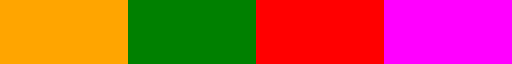

In [128]:
color_map

In [129]:
from wordcloud import WordCloud

In [130]:
cloud = WordCloud(
    background_color='white',  # Cor de fundo (obvio)
    max_words=100,  # Considera as 100 palavras mais repetidas
    colormap=color_map  # Colocando as cores que serao as palavras
)

In [131]:
import matplotlib.pyplot as plt

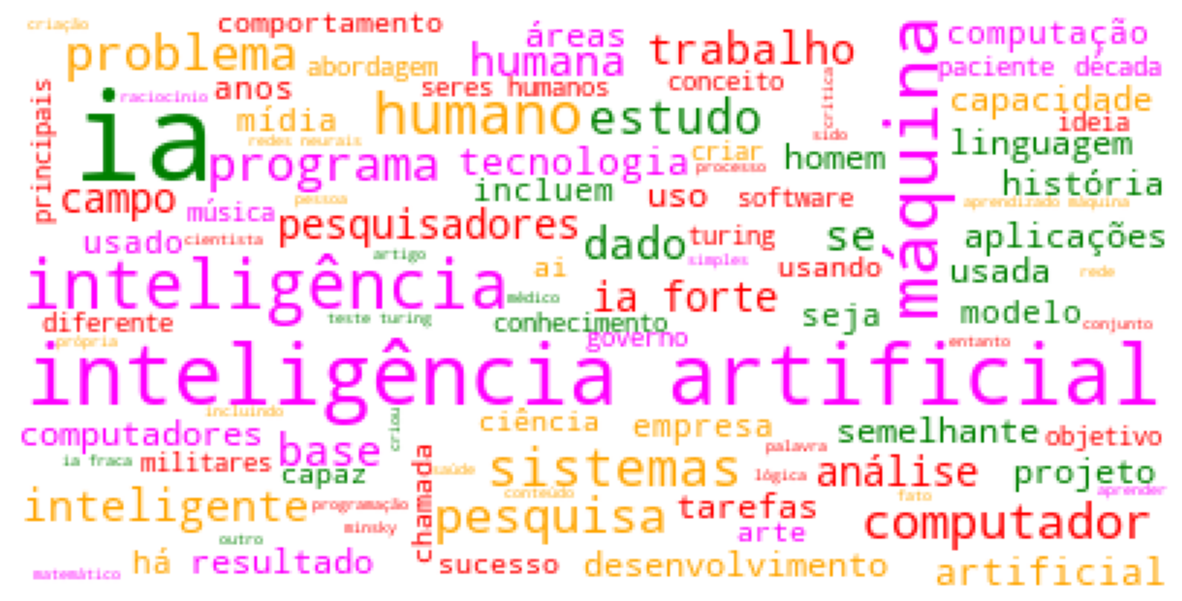

In [132]:
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()